In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.signal import find_peaks

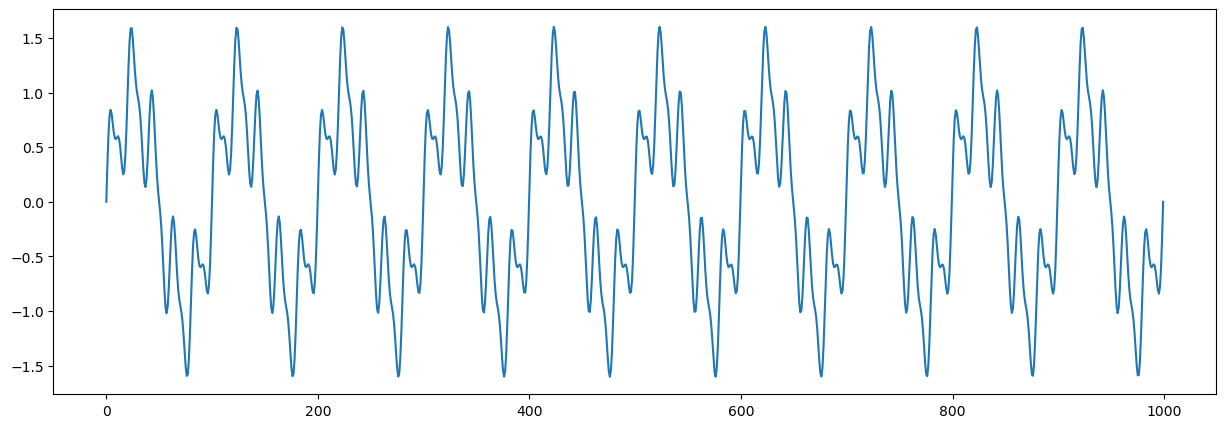

In [9]:
# Generar una señal de ejemplo

frequencies = [10, 50, 100]
fs=1000
ts = 1/fs
n=np.arange(1000)
T=n*ts
amplitudes = [1, 0.5, 0.2]

signal = np.sum([amplitude * np.sin(2 * np.pi * frequency * t) for frequency, amplitude in zip(frequencies, amplitudes)], axis=0)

plt.figure(figsize=(15, 5))
plt.plot(signal)

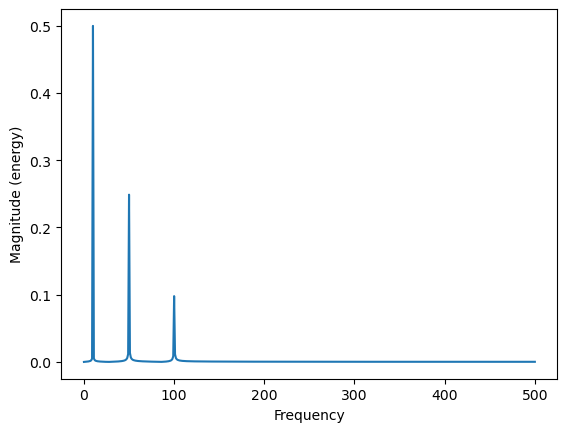

In [16]:
plt.magnitude_spectrum(signal, Fs=fs,window=np.ones(signal.shape))# , sides='twosided')
plt.show()

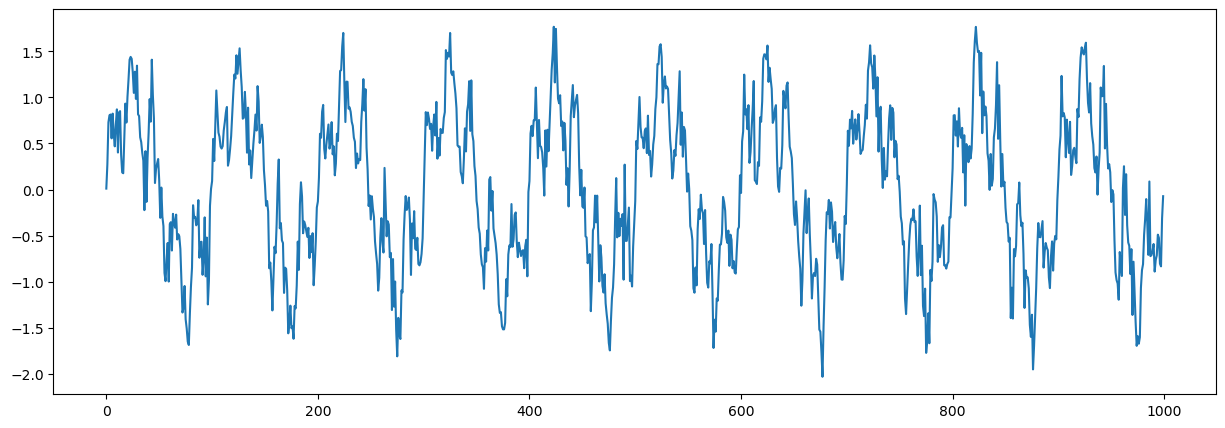

In [21]:
# Generar ruido gaussiano
mean = 0  # Media del ruido
std = 0.2  # Desviación estándar del ruido
noise = np.random.normal(mean, std, len(signal))

# Agregar ruido a la señal
signal_with_noise = signal + noise

plt.figure(figsize=(15, 5))
plt.plot(signal_with_noise)

In [22]:


# Aplicar la transformada wavelet
coeffs = pywt.wavedec(signal_with_noise, 'db4', level=5)

# Filtrar los coeficientes
threshold = 0.2
filtered_coeffs = [pywt.threshold(coeff, threshold, mode='soft') for coeff in coeffs]

# Reconstruir la señal filtrada
filtered_signal = pywt.waverec(filtered_coeffs, 'db4')


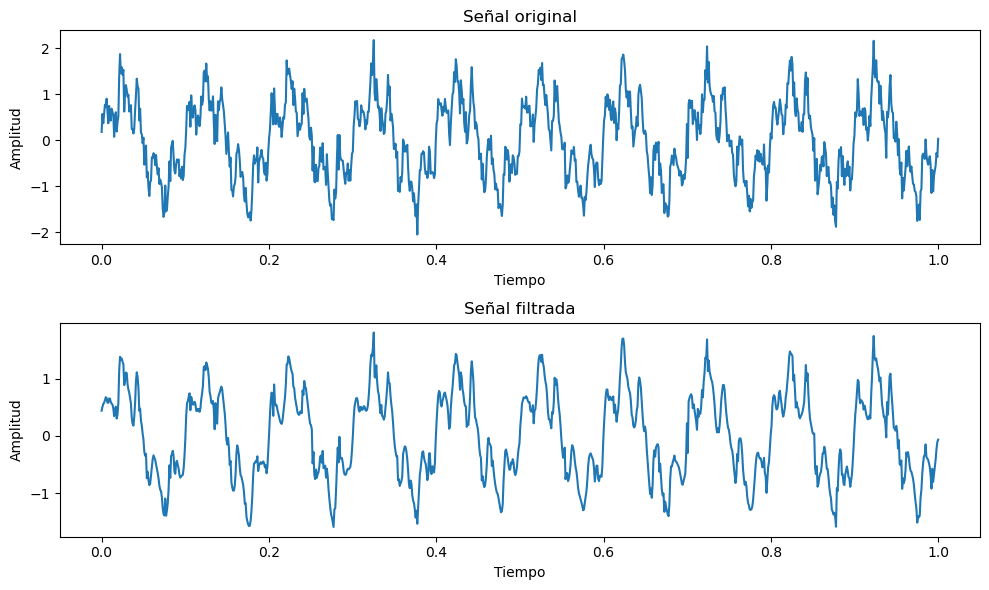

In [15]:
# Visualizar la señal original y la señal filtrada
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal_with_noise)
plt.title('Señal original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal)
plt.title('Señal filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()